In [6]:
import numpy as np
import scipy as sp
import sympy as smp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

np.random.seed(42)
palette = sns.color_palette("tab10", as_cmap=True)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})

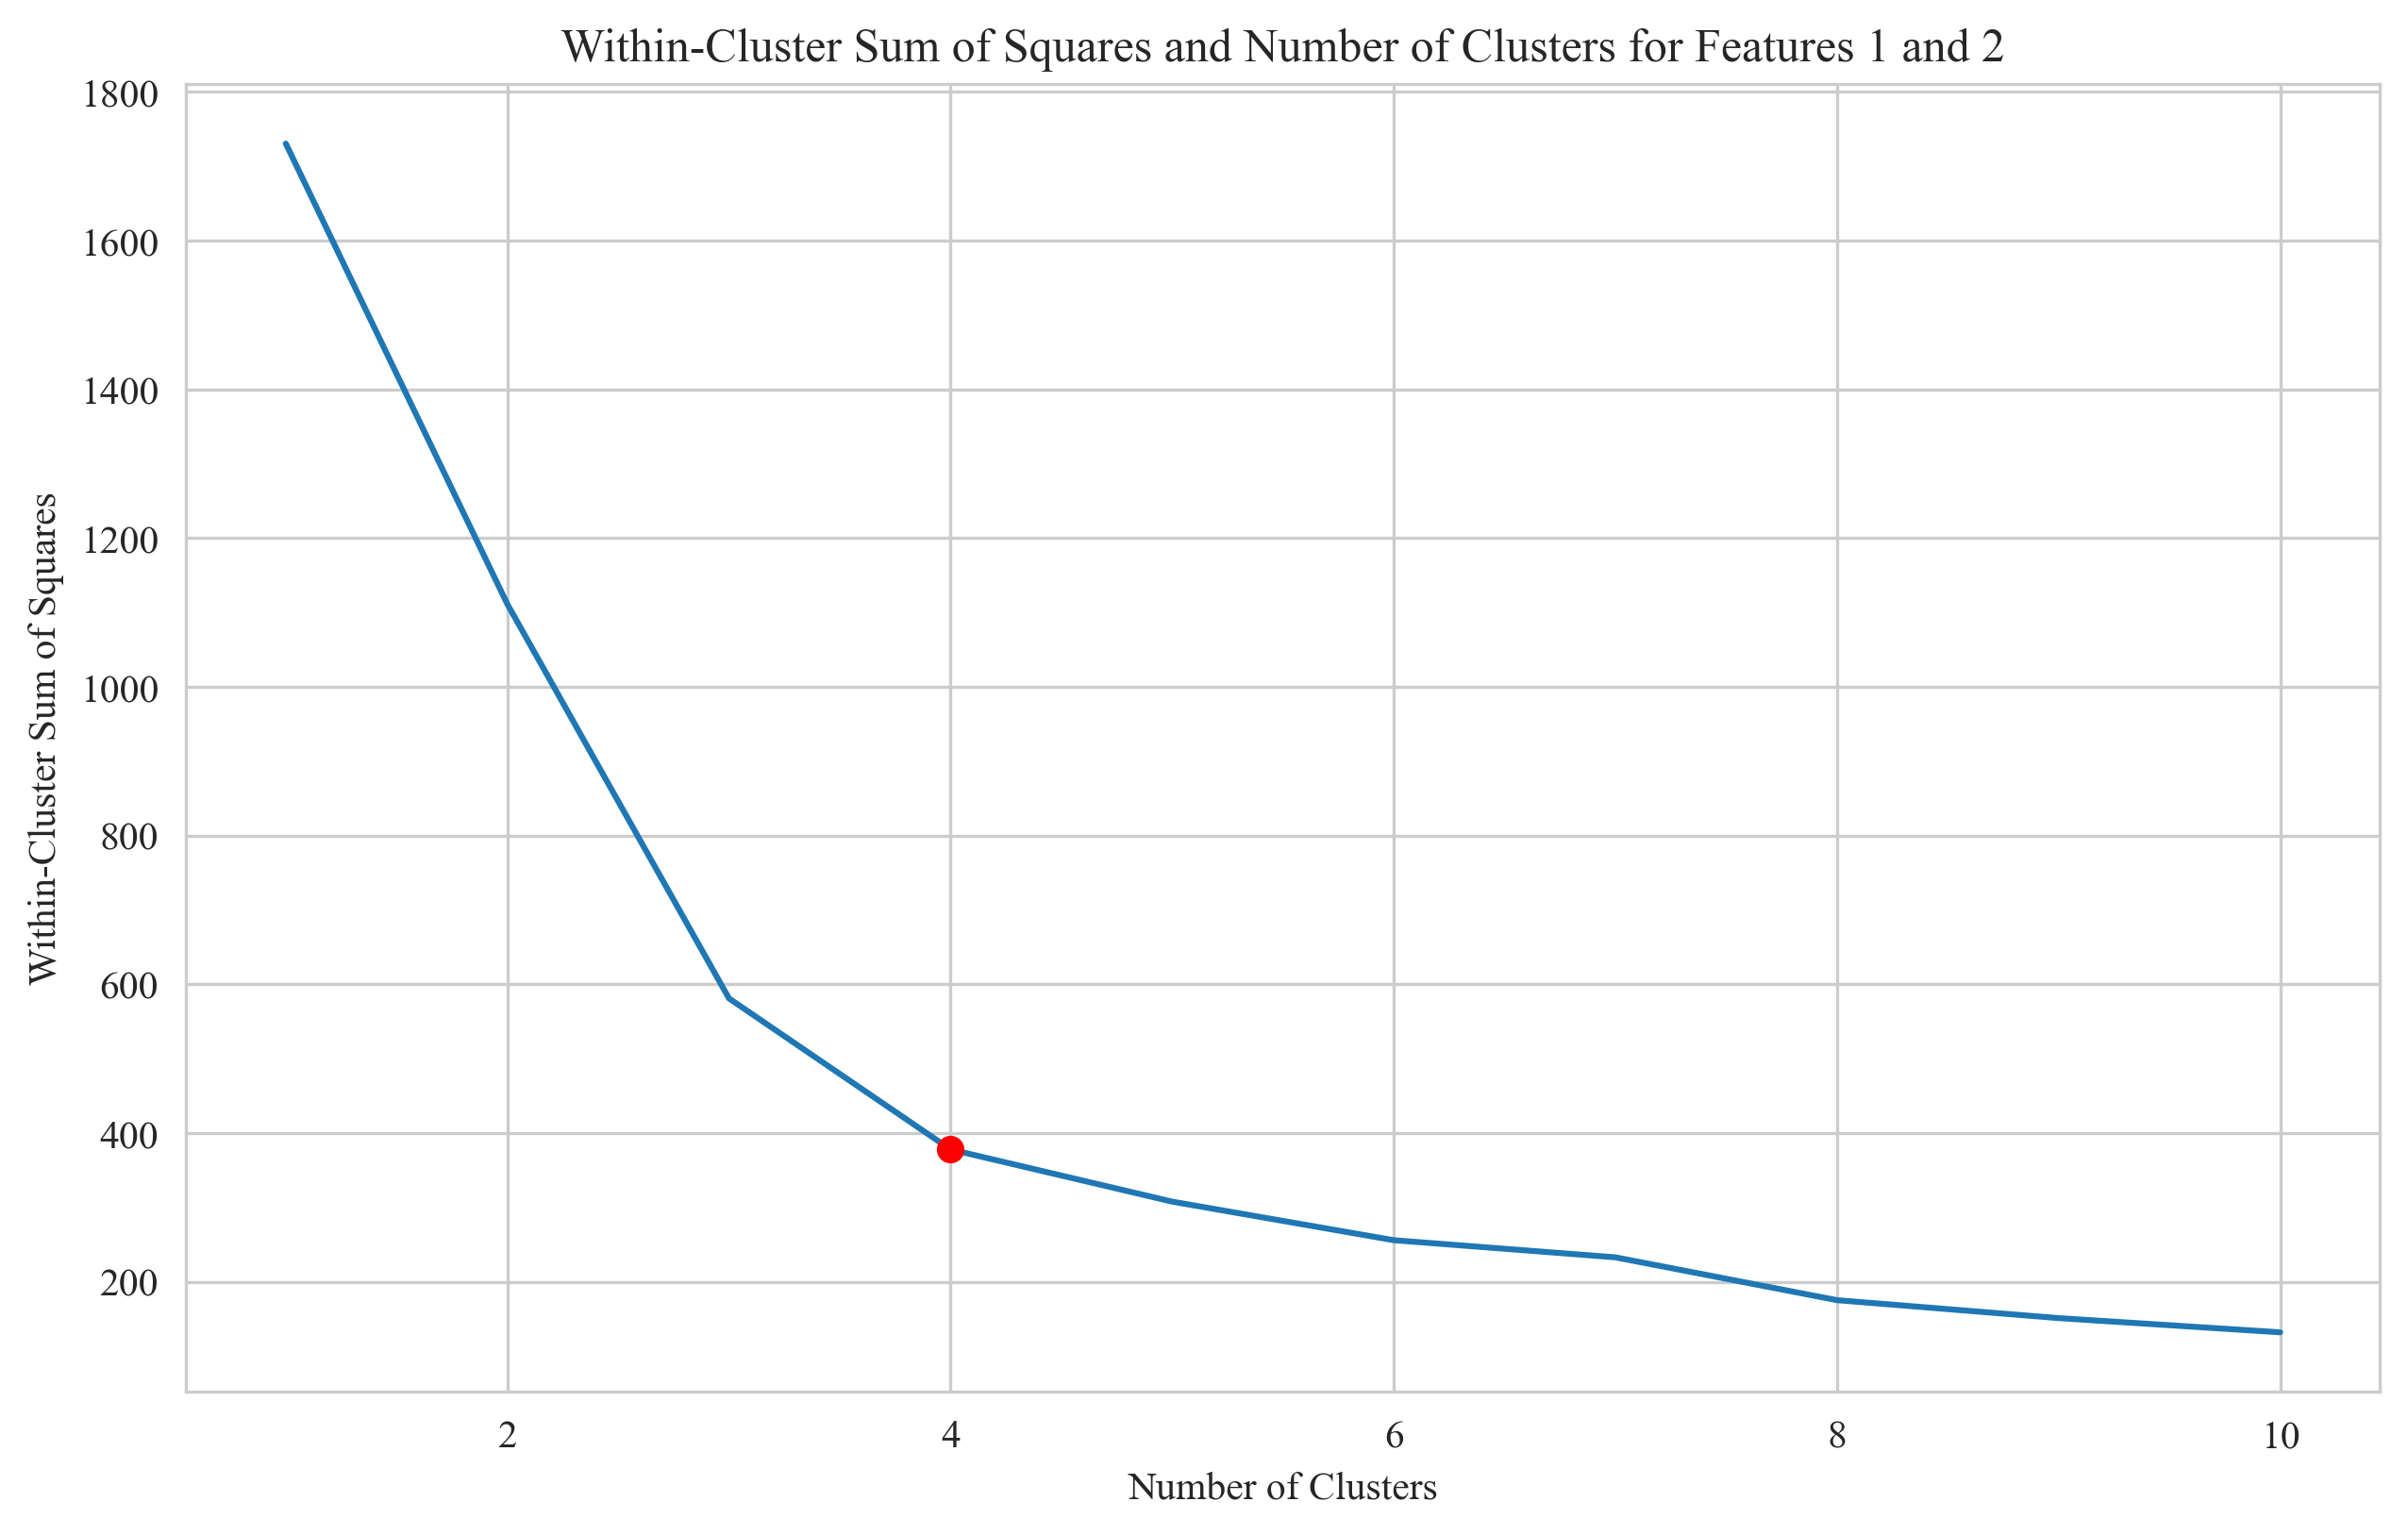

In [7]:
data = 10 * np.random.random(size = (100, 2))
K = []
WCSS = []
for k in range(1, 11):
    K.append(k)
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = "auto").fit(data)
    WCSS.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
plt.scatter(x = [K[3]], y = [WCSS[3]], marker = "o", color="red", zorder = 2)
plt.plot(K, WCSS, zorder = 1)
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Within-Cluster Sum of Squares and Number of Clusters for Features 1 and 2")
plt.show()

In [8]:
c = 4
kmeans = KMeans(n_clusters = c, random_state = 42, n_init = "auto").fit(data)
labels = kmeans.labels_
df = pd.DataFrame({
    "Feature 1" : list(map(lambda x : x[0], data)),
    "Feature 2" : list(map(lambda x : x[1], data)),
    "Cluster" : labels
})

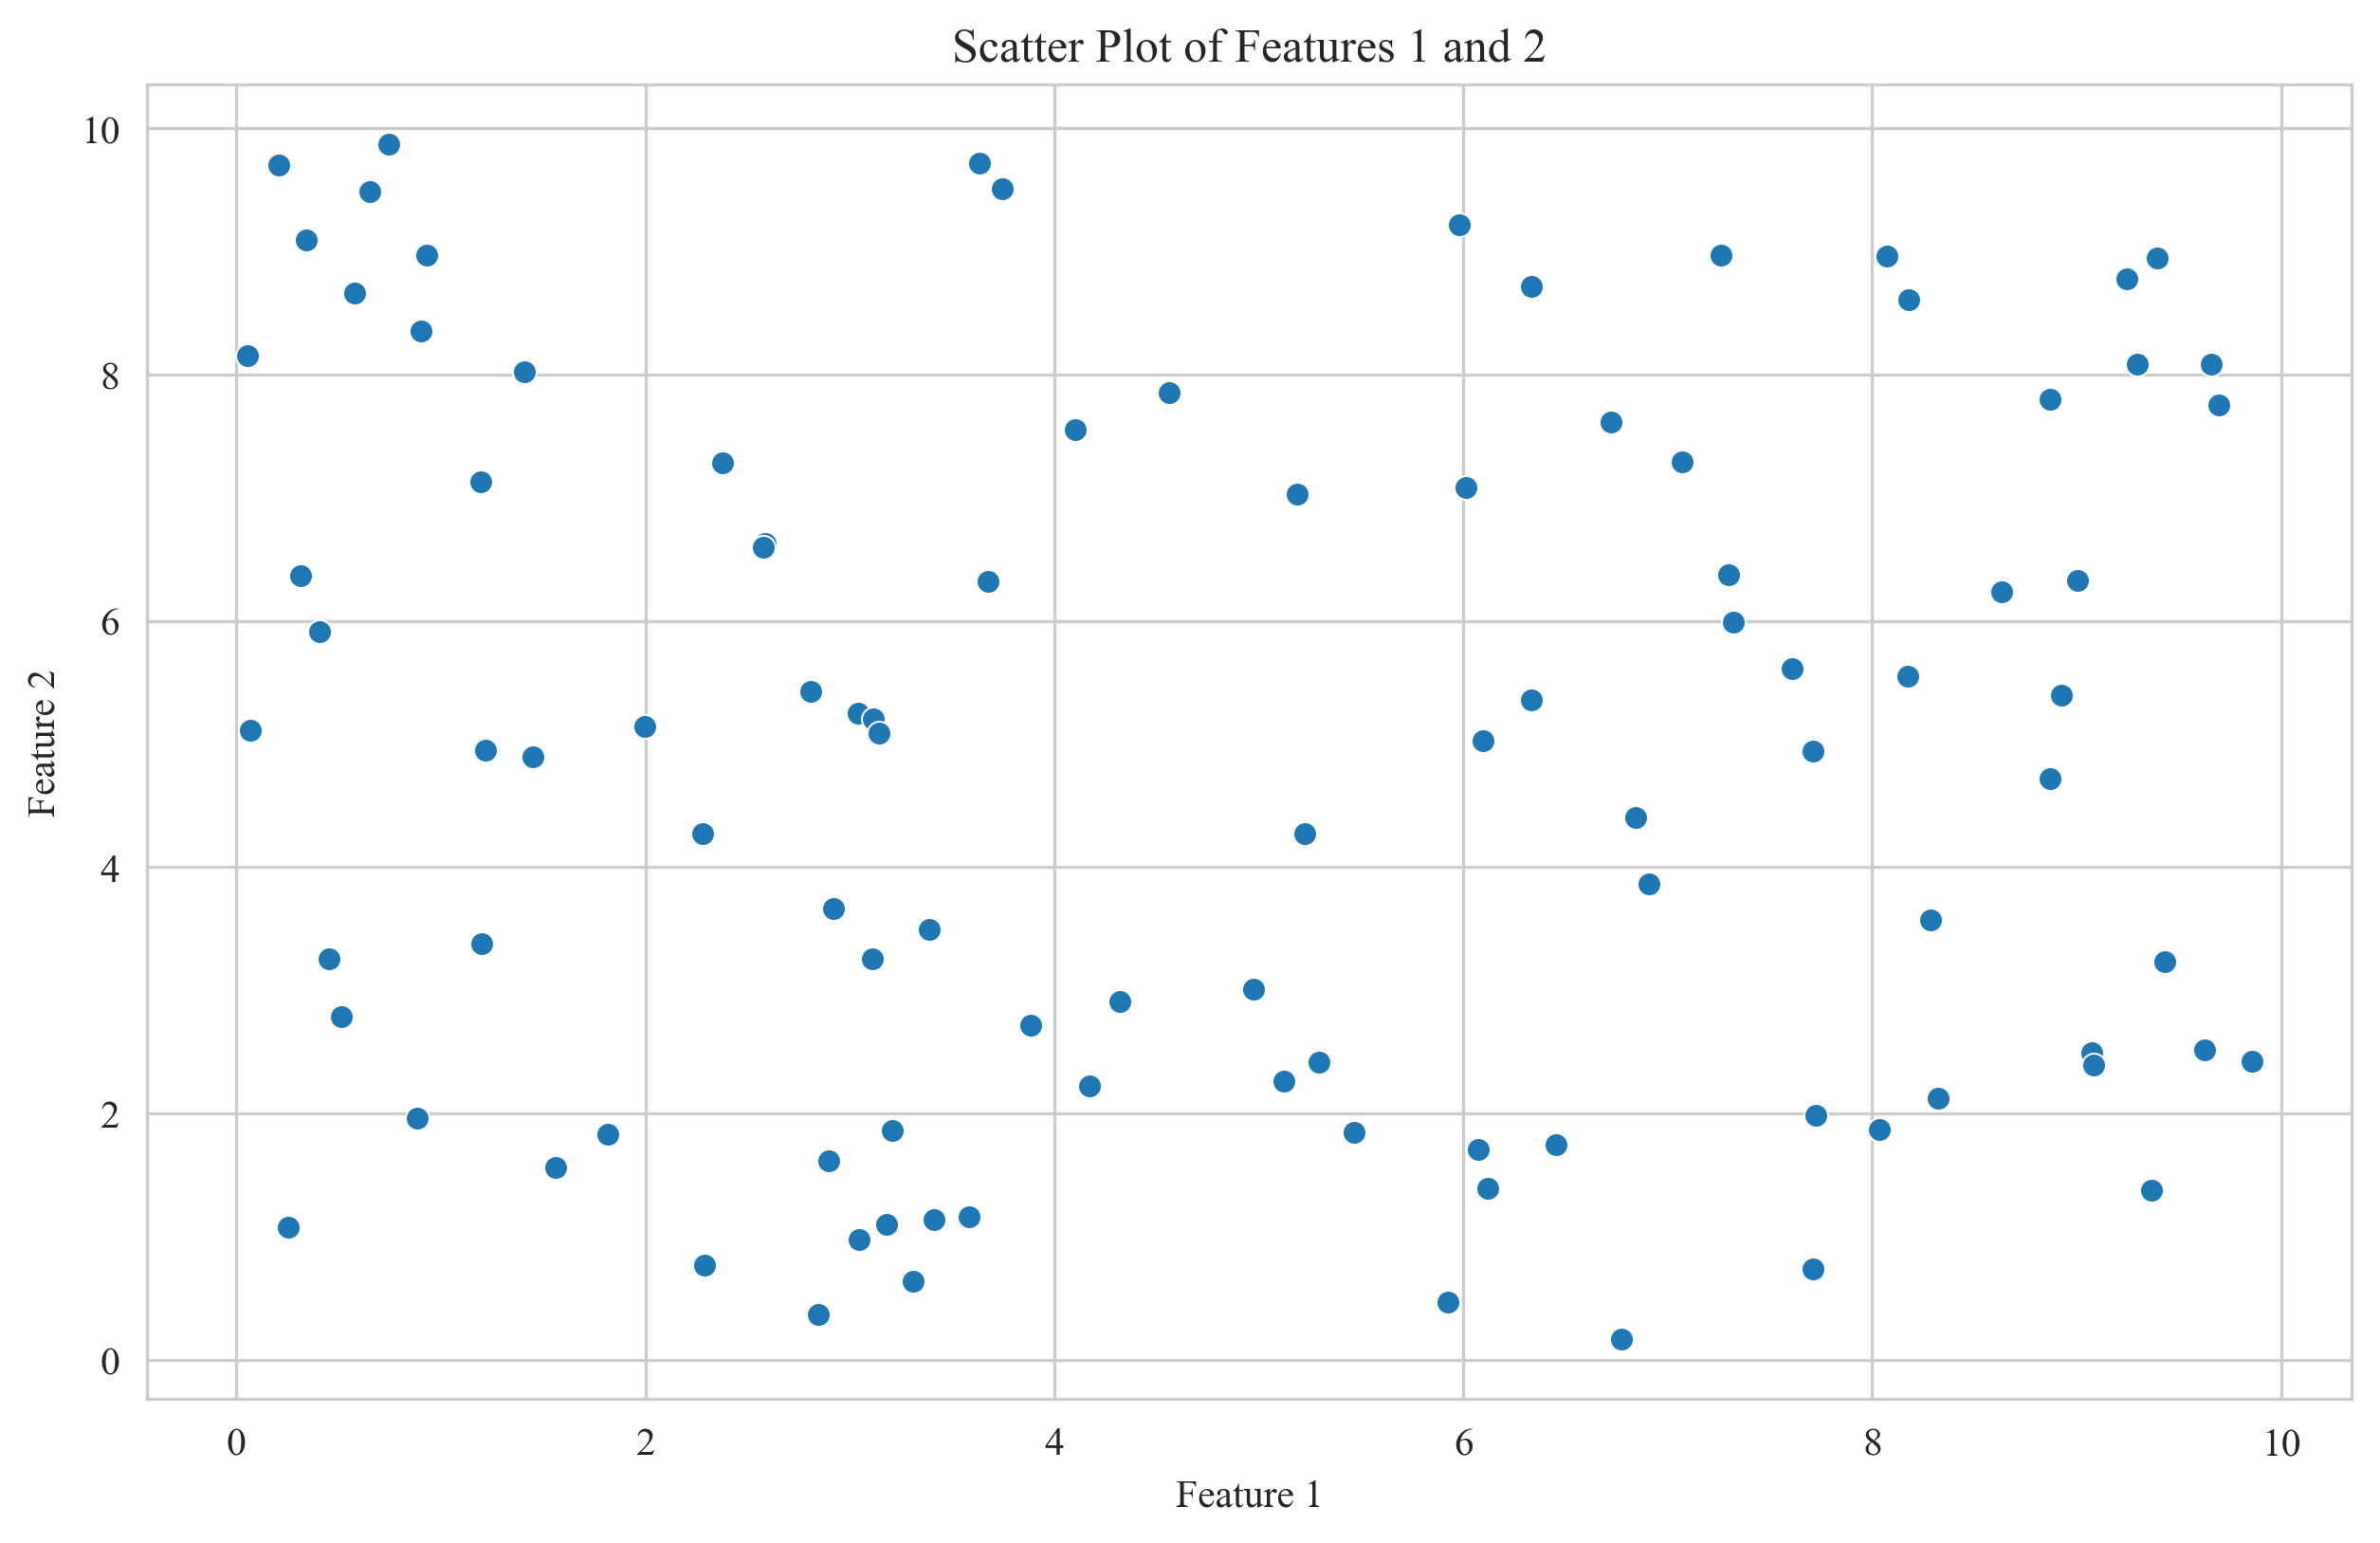

In [9]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
sns.scatterplot(
    data = df,
    x = "Feature 1",
    y = "Feature 2",
)
plt.title("Scatter Plot of Features 1 and 2")
plt.show()

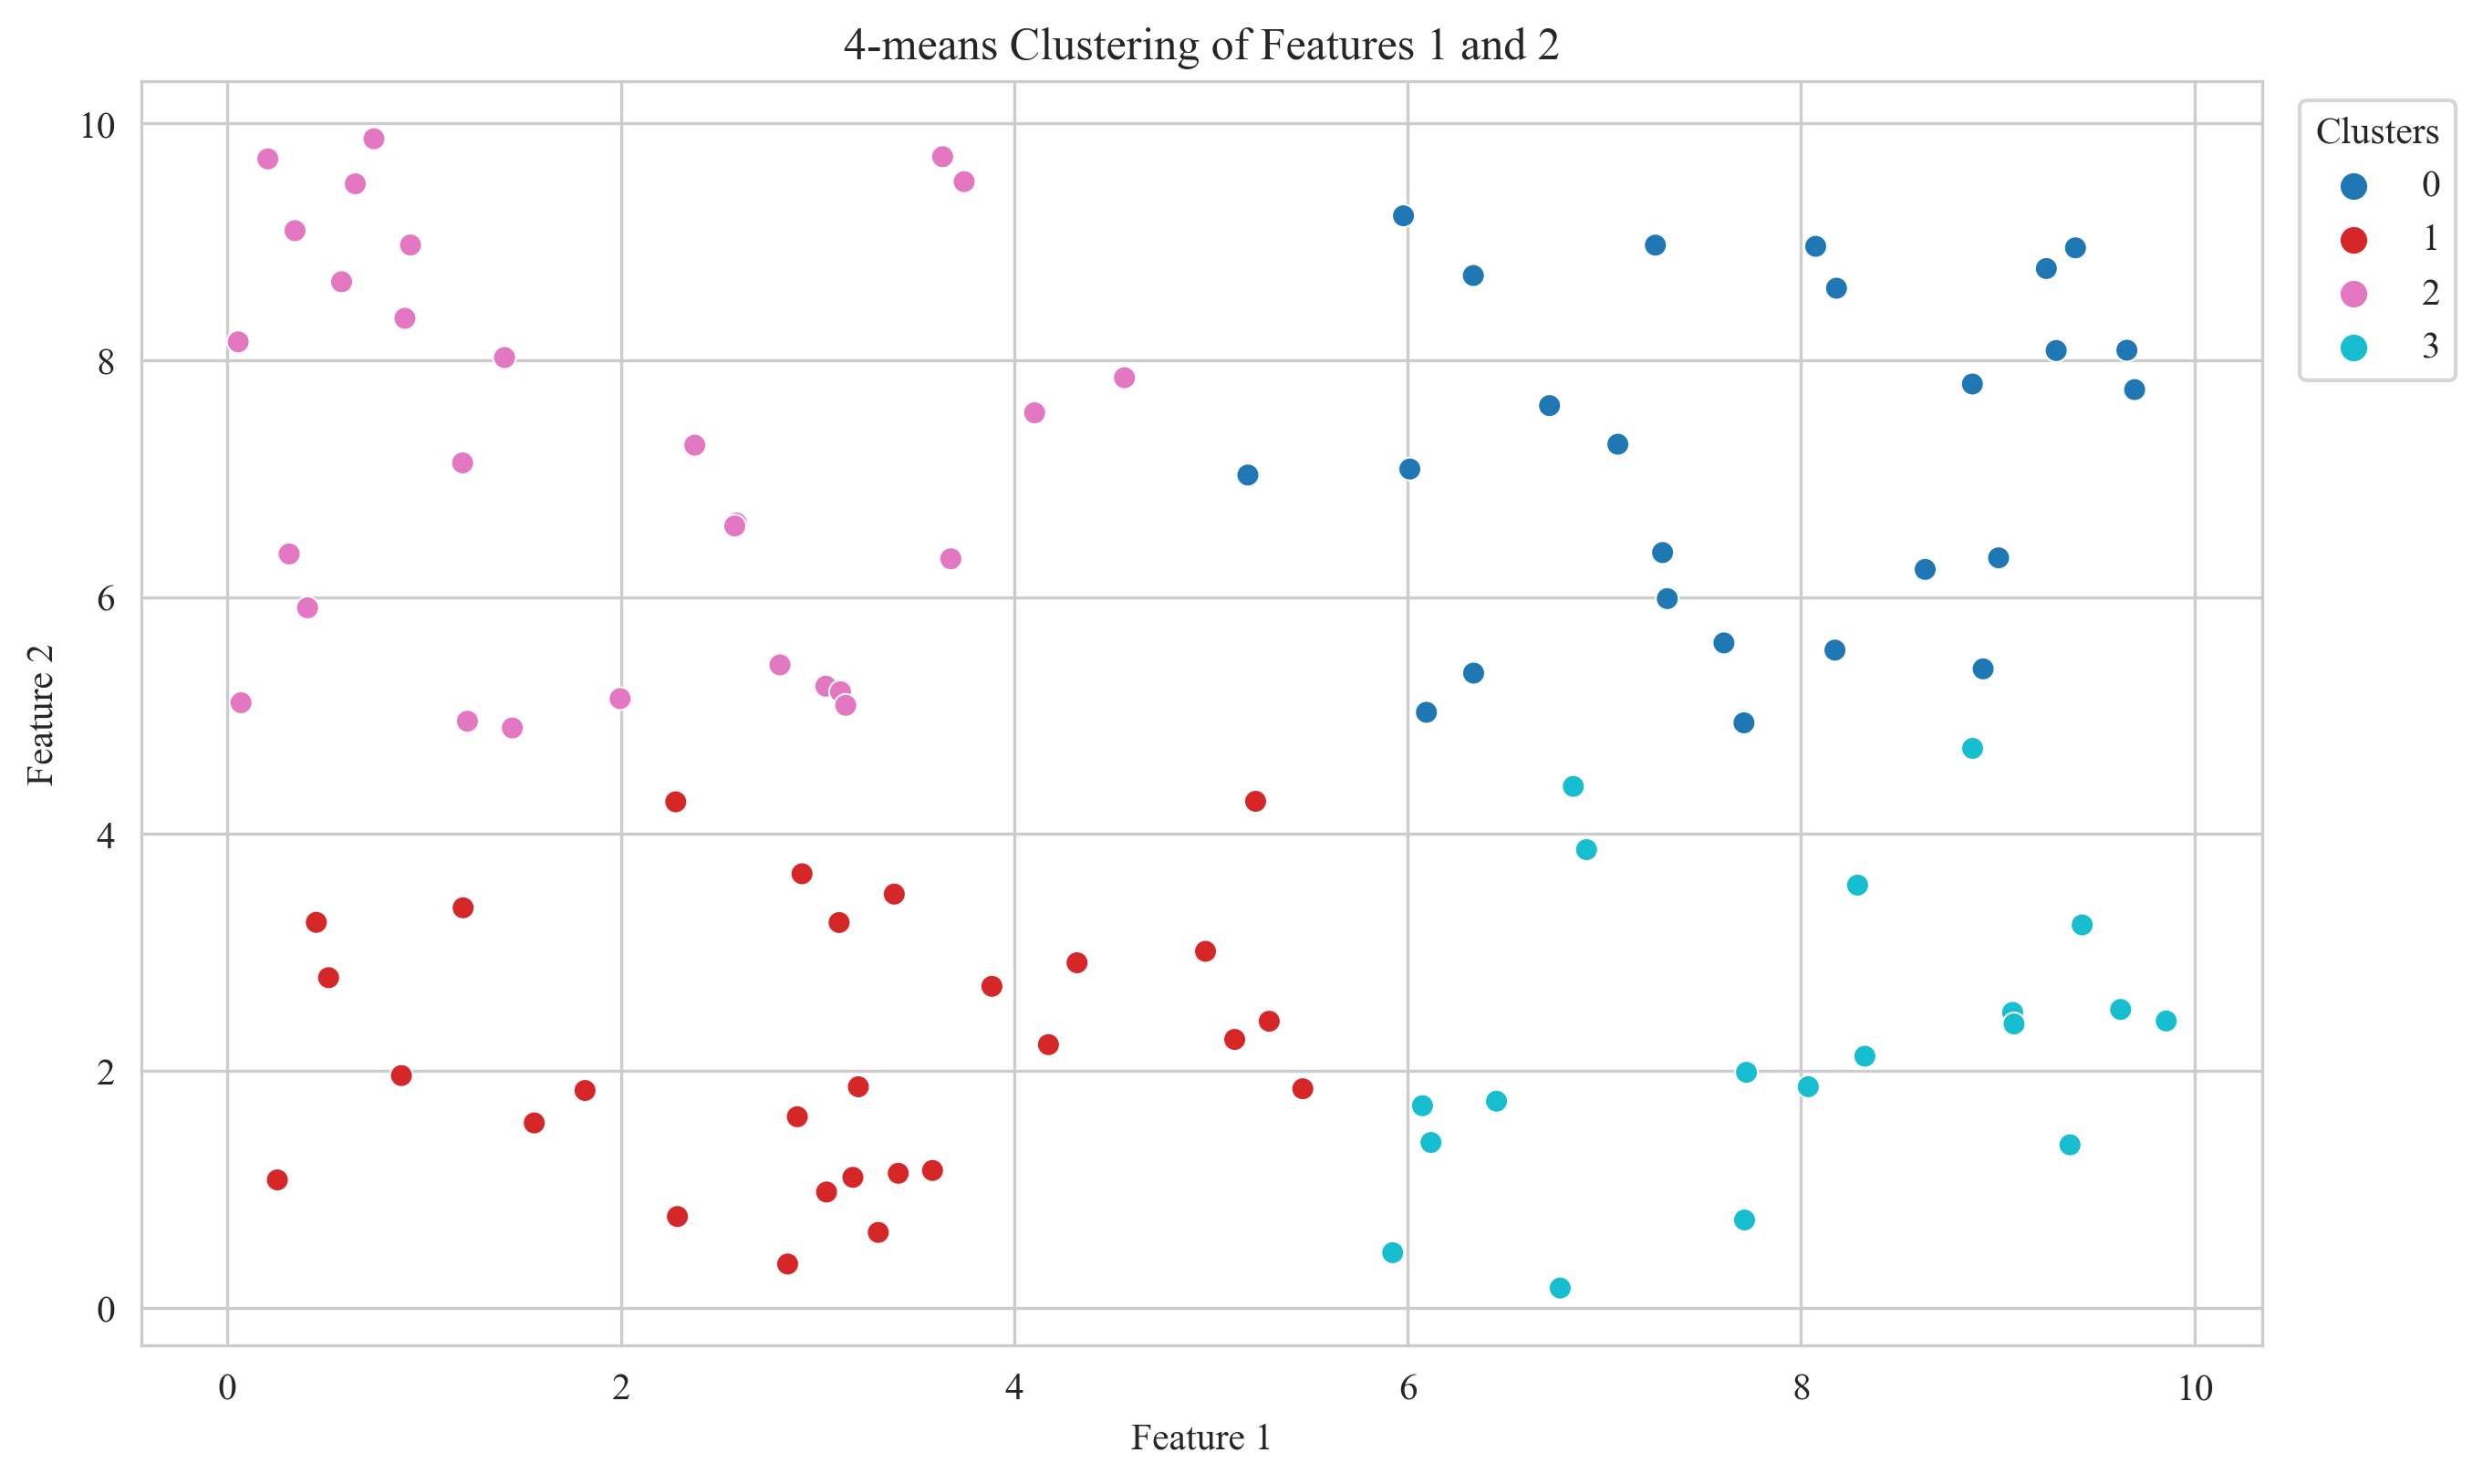

In [10]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
sns.scatterplot(data = df, x = "Feature 1", y = "Feature 2", hue = "Cluster", palette = palette)
plt.title(f"{c}-means Clustering of Features 1 and 2")
plt.legend(title = "Clusters", loc="upper right", bbox_to_anchor=(1.1, 1), fancybox = True)
plt.show()